In [3]:
% matplotlib inline 
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
# import Galton Families data

gf_data=pd.read_csv('/Users/scheo/Documents/PythonPractice/cookbook-data/GaltonFamilies.csv')

In [5]:

gf_data.columns
del gf_data['Unnamed: 0']

In [6]:
gf_data.head()

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,1,78.5,67.0,75.43,4,1,male,73.2
1,1,78.5,67.0,75.43,4,2,female,69.2
2,1,78.5,67.0,75.43,4,3,female,69.0
3,1,78.5,67.0,75.43,4,4,female,69.0
4,2,75.5,66.5,73.66,4,1,male,73.5


In [8]:
gf_data.pivot_table(columns='childNum')

childNum,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
childHeight,69.820976,68.245930,67.092617,65.701575,64.675000,64.073529,63.43200,63.166667,63.18750,62.988889,62.480,61.00,60.00,58.00,57.00
children,4.556098,5.238372,5.738255,6.212598,6.927083,7.720588,8.34000,9.030303,10.12500,11.000000,11.800,15.00,15.00,15.00,15.00
father,69.316098,69.297674,69.329530,69.244882,69.194792,69.088235,68.90000,68.900000,68.59375,68.277778,68.300,66.00,66.00,66.00,66.00
midparentHeight,69.219102,69.265977,69.292537,69.247071,69.216458,69.275647,69.12448,69.160545,68.90750,68.608889,68.602,64.86,64.86,64.86,64.86
mother,64.001951,64.105814,64.125503,64.119685,64.109375,64.317647,64.21200,64.278788,64.09375,63.833333,63.800,59.00,59.00,59.00,59.00


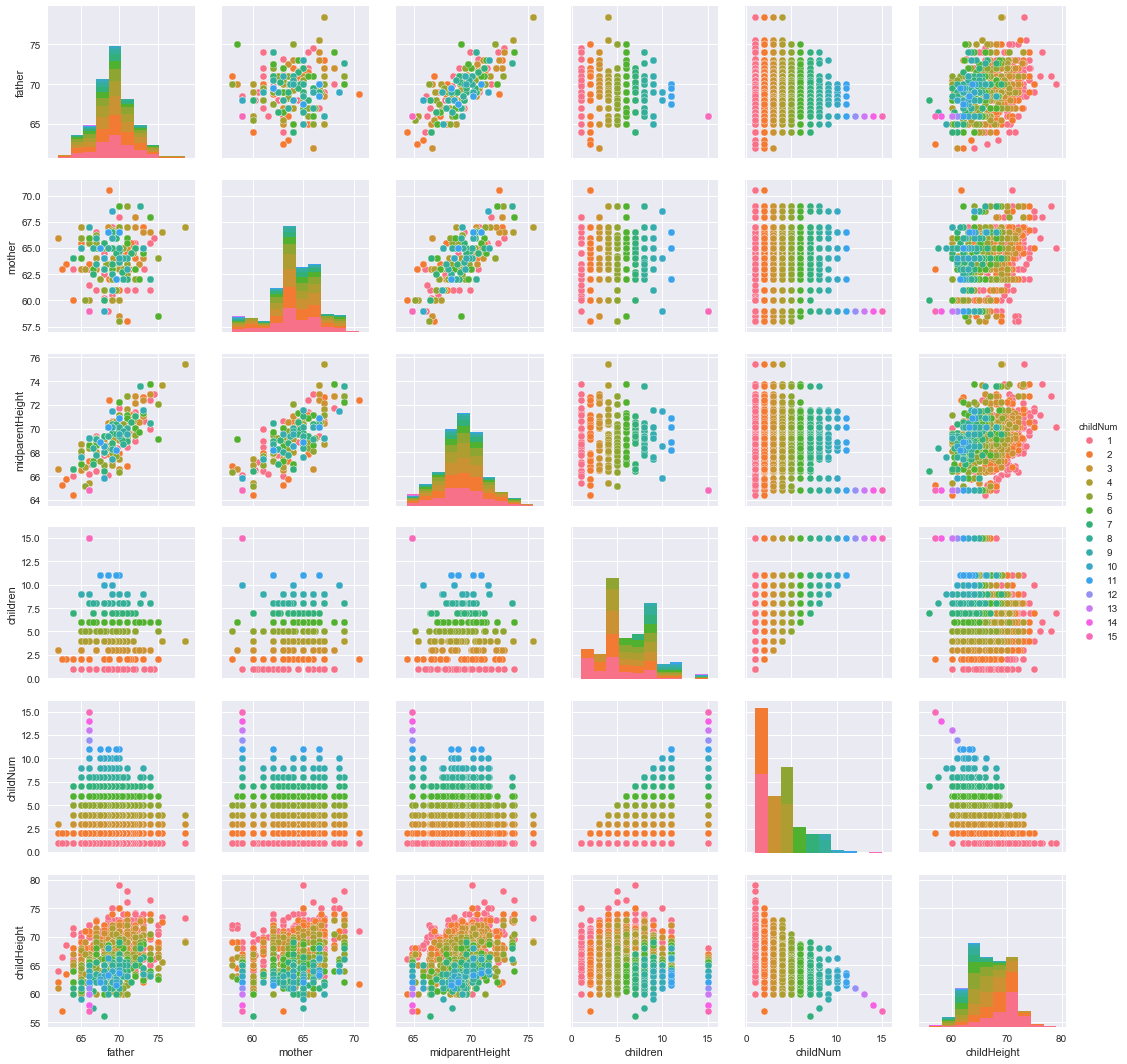

In [10]:
# let's visualize the data:

sns.pairplot(gf_data)

# we can look at it by gender too:

# or by 'childNum'

In [20]:
mean_ph=np.mean(gf_data['midparentHeight'])

In [21]:
mean_ph

69.20677301927185

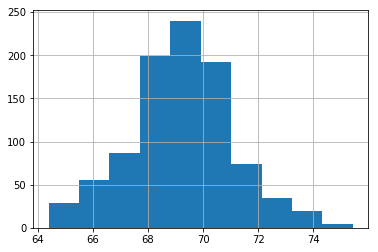

In [23]:
gf_data['midparentHeight'].hist()

In [24]:
# From the histogram, it looks like parent heights averaged around 69 inches, let's use 69 as the cut off

tall_parents=gf_data[gf_data['midparentHeight']>69]
short_parents=gf_data[gf_data['midparentHeight']<69]

# We can consider these two independent sampels

In [25]:
len(tall_parents)

525

In [26]:
len(short_parents)

409

In [29]:
parent_ttest=stats.ttest_ind(tall_parents['childHeight'],short_parents['childHeight'],equal_var=False)

In [33]:
# Note that, the t-test is essentially measuring the disitrbution of difference between two samples. 
#If the hypothesis is true, then we would expect that the t-stats to be close to 0 

parent_ttest.pvalue

3.3288366169361816e-14

In [11]:
# Build a very simple regression model

linear_model=stats.linregress(x=gf_data['midparentHeight'],y=gf_data['childHeight'])

In [14]:
m_model=linear_model.intercept
s_model=linear_model.slope

In [18]:
# use the slope and intercept to create a linear model:
x=gf_data['midparentHeight']
y_hat=s_model*x + m_model
y=gf_data['childHeight']

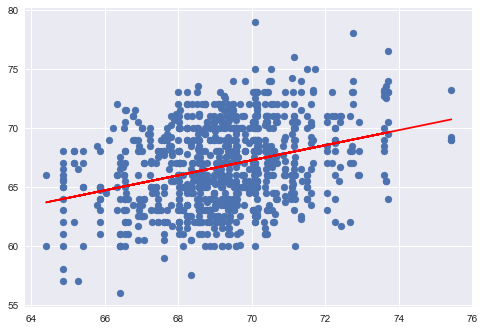

In [20]:
plt.scatter(x,y,)
plt.plot(x,y_hat,color='red')

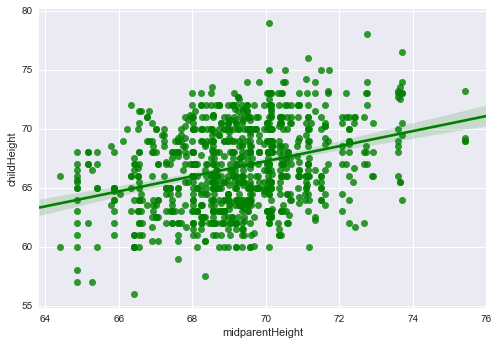

In [31]:
# There is another way to do this using seaborn:

sns.regplot(x='midparentHeight',y='childHeight',data=gf_data,color='green')

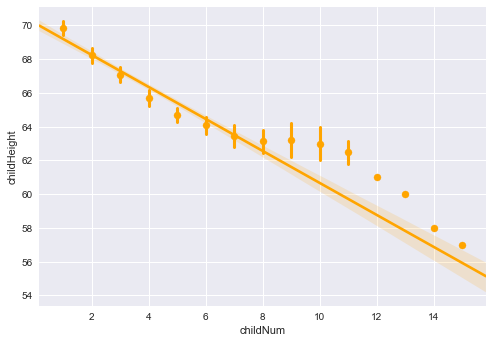

In [34]:
# we can also look at how discrete x variables affects the model too
sns.regplot(x='childNum',y='childHeight',data=gf_data,x_estimator=np.mean,color='orange')

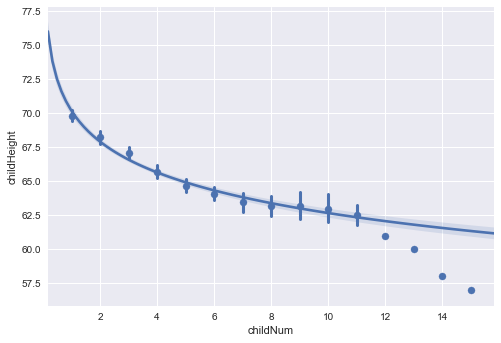

In [45]:
sns.regplot(x='childNum',y='childHeight',data=gf_data,x_estimator=np.mean,logx=True)

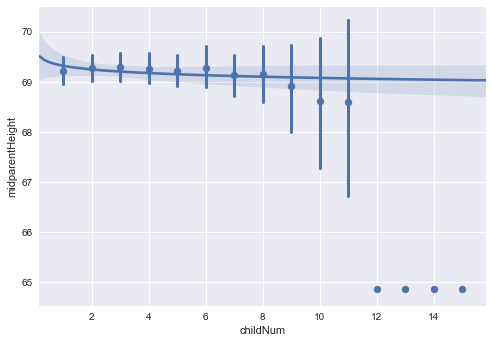

In [46]:
sns.regplot(x='childNum',y='midparentHeight',data=gf_data,x_estimator=np.mean,logx=True)

In [48]:
corr_mat=gf_data.corr()

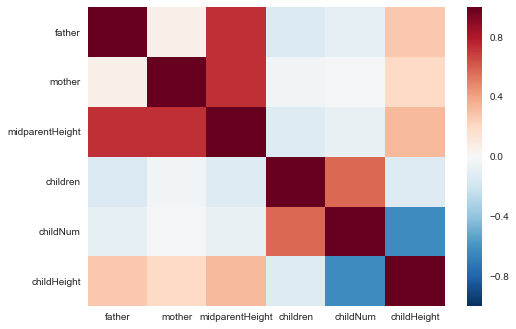

In [50]:
sns.heatmap(corr_mat)